<a href="https://colab.research.google.com/github/kayal466/Take-home-Task/blob/main/Take_Home_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing** **Essential** **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysing and Understanding The data

In [31]:
df=pd.read_csv("/content/takehome_user_engagement.csv")
df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [32]:
df["time_stamp"]=pd.to_datetime(df["time_stamp"])

In [33]:
df["time_stamp"][0]

Timestamp('2014-04-22 03:53:30')

In [4]:
df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [5]:
df.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [35]:
df.groupby(df["user_id"])["visited"].sum()

user_id
1         1
2        14
3         1
4         1
5         1
         ..
11996     1
11997     1
11998     1
11999     1
12000     1
Name: visited, Length: 8823, dtype: int64

In [36]:
groupby_df=df.groupby(df["user_id"])["visited"].sum()

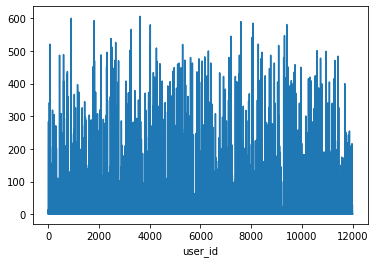

In [58]:
groupby_df.plot.line()

In [50]:
import statsmodels.api as sm

In [51]:
y=df["visited"]
x=df["user_id"]

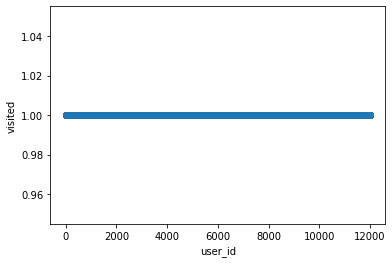

In [52]:
plt.scatter(x,y)
plt.xlabel("user_id")
plt.ylabel("visited")
plt.show()

In [53]:
x=sm.add_constant(x)
print(x)

        const  user_id
0         1.0        1
1         1.0        2
2         1.0        2
3         1.0        2
4         1.0        2
...       ...      ...
207912    1.0    11996
207913    1.0    11997
207914    1.0    11998
207915    1.0    11999
207916    1.0    12000

[207917 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [54]:
x_ols=sm.add_constant(x)
model=sm.OLS(y,x_ols)
result=model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                visited   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -2.079e+05
Date:                Mon, 21 Nov 2022   Prob (F-statistic):               1.00
Time:                        14:21:48   Log-Likelihood:             7.0068e+06
No. Observations:              207917   AIC:                        -1.401e+07
Df Residuals:                  207915   BIC:                        -1.401e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   2.47e-18   4.06e+17      0.000       1.000       1.000
user_id    -4.885e-21   3.62e-22    -13.508      0.000   -5.59e-21   -4.18e-21
==============================================================================
Omnibus:                   193211.350   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4699943.372
Skew:                           4.817   Prob(JB):                         0.00
Kurtosis:                      24.206   Cond. No.                     1.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Summary

**In this** **dataset user id is** **a independent** **data and** **visited is a** **depentent data.**

**The take home engagement** **users csv constant value is 1** **based liner algorithm.**

**By using the group by** **operation we can** **understand the visited id** **based on user** **id.** 


# Take Home Users csv
 



In [60]:
df1=pd.read_csv("/content/takehome_users.csv",encoding="latin-1")

In [61]:
df1.head(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,1.356010e+09,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaN,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaN,0,0,302,NaN
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0


In [8]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [9]:
df1.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [63]:
df1["creation_time"]=pd.to_datetime(df1["creation_time"])

In [12]:
df1["creation_time"][0]

Timestamp('2014-04-22 03:53:30')

In [65]:
df1["last_session_creation_time"]=pd.to_datetime(df1["last_session_creation_time"])

In [14]:
df1["last_session_creation_time"][0]

Timestamp('1970-01-01 00:00:01.398138810')

In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [82]:
df1.groupby("creation_source").sum()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
creation_source,,,,,
GUEST_INVITE,12868683,541,319,305726,12788848.0
ORG_INVITE,25446830,1078,644,591054,25475448.0
PERSONAL_PROJECTS,12613915,512,303,304605,0.0
SIGNUP,12565465,525,319,305220,0.0
SIGNUP_GOOGLE_AUTH,8511107,338,207,196010,0.0


# Visualizing the Data

In [83]:
group3=df1.groupby("creation_source").sum()

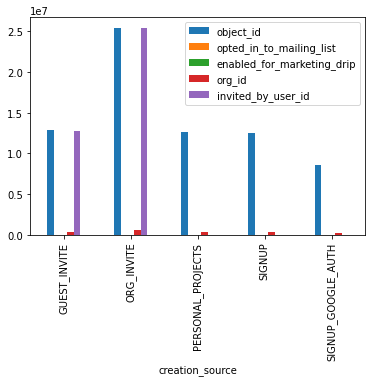

In [84]:
group3.plot.bar()

In [67]:
df1.groupby(df1["opted_in_to_mailing_list"])["org_id"].sum()

opted_in_to_mailing_list
0    1275602
1     427013
Name: org_id, dtype: int64

In [68]:
group=df1.groupby(df1["opted_in_to_mailing_list"])["org_id"].sum()

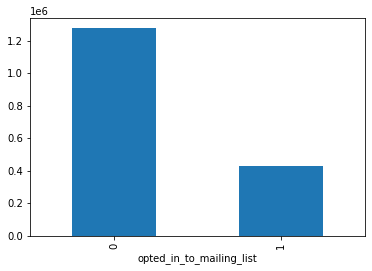

In [69]:
group.plot.bar()

In [71]:
group1=df1.groupby(df1["invited_by_user_id"])["org_id"].sum()

In [74]:
data=[df,df1]
final=pd.concat(data)

In [75]:
final

,time_stamp,user_id,visited,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,2014-04-22 03:53:30,1.0,1.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,2013-11-15 03:45:04,2.0,1.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,2013-11-29 03:45:04,2.0,1.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,2013-12-09 03:45:04,2.0,1.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,2013-12-25 03:45:04,2.0,1.0,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,NaT,NaN,NaN,11996.0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1970-01-01 00:00:01.378448055,0.0,0.0,89.0,8263.0
11996,NaT,NaN,NaN,11997.0,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1970-01-01 00:00:01.358274517,0.0,0.0,200.0,NaN
11997,NaT,NaN,NaN,11998.0,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1970-01-01 00:00:01.398602716,1.0,1.0,83.0,8074.0
11998,NaT,NaN,NaN,11999.0,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1970-01-01 00:00:01.338638159,0.0,0.0,6.0,NaN


In [85]:
df1["creation_source"]=df1["creation_source"].map({"PERSONAL_PROJECTS":1,"SIGNUP":2,"SIGNUP_GOOGLE_AUTH":3,"ORG_INVITE":4,"GUEST_INVITE":5})
df1

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,5,1970-01-01 00:00:01.398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,4,1970-01-01 00:00:01.396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,4,1970-01-01 00:00:01.363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,5,1970-01-01 00:00:01.369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,5,1970-01-01 00:00:01.358849660,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,4,1970-01-01 00:00:01.378448055,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,3,1970-01-01 00:00:01.358274517,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,5,1970-01-01 00:00:01.398602716,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,1,1970-01-01 00:00:01.338638159,0,0,6,NaN


# Summary 2



*   This is a cluster data set.
*   The shape of the dataset is 12000 X 10.
*   In this(invited_by_user_id &last_session_creation_time) two columns null values are there.
*   By grouping the creation source we can understand performance of rest of the columns.
*   This dataset is not correlated with each other.
*   Here we need to change the datetime to timestamp.
*   We can replace the null values by interploation.
*   By implementing K means algorithm we can predict the users.  










In [76]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219917 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  207917 non-null  datetime64[ns]
 1   user_id                     207917 non-null  float64       
 2   visited                     207917 non-null  float64       
 3   object_id                   12000 non-null   float64       
 4   creation_time               12000 non-null   datetime64[ns]
 5   name                        12000 non-null   object        
 6   email                       12000 non-null   object        
 7   creation_source             12000 non-null   object        
 8   last_session_creation_time  8823 non-null    datetime64[ns]
 9   opted_in_to_mailing_list    12000 non-null   float64       
 10  enabled_for_marketing_drip  12000 non-null   float64       
 11  org_id                      12000 non-nu

In [101]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 15.1 MB/s 
     |████████████████████████████████| 1.0 MB 56.6 MB/s 
     |████████████████████████████████| 133 kB 61.0 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 28.5 MB 1.6 MB/s 
     |████████████████████████████████| 78 kB 6.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 101 kB 9.0 MB/s 
     |████████████████████████████████| 749 kB 56.4 MB/s 
     |████████████████████████████████| 965 kB 59.9 MB/s 
     |████████████████████████████████| 1.0 MB 69.8 MB/s 
     |████████████████████████████████| 96 kB 6.2 MB/s 
     |████████████████████████████████| 232 kB 64.7 MB/s 
     |████████████████████████████████| 1.6 MB 46.5 MB/s 
     |██████████████████████

# Data Report

In [102]:
from dataprep.eda import create_report

DataPrep Report
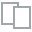
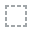
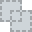
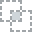
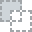
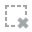
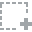
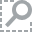
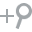
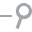
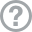
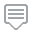
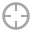
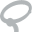
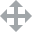
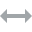
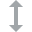
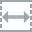
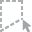
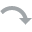
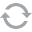
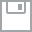
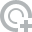
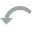
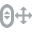
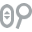
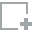
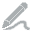
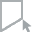
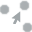
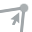
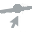

In [103]:
create_report(df1)

DataPrep Report
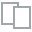
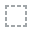
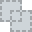
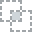
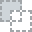
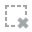
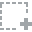
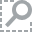
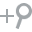
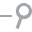
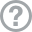
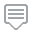
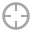
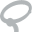
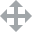
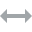
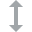
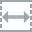
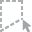
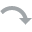
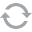
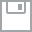
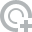
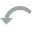
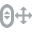
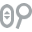
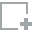
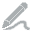
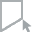
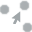
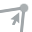
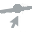

In [108]:
create_report(df)